This Python module goes once again through all pages in "./HTML_pages", but this time:
    1) It recovers only the descriptors we determined in "02_Data_Modelling.ipynb";
    2) Groups similar descriptors under a common name (also determined in "02_Data_Modelling.ipynb")
    3) Stores each album's descriptors in individual lists (conceptually acting as vectors), all inside a single list
    4) Saves this list, which acts as a collection of vectors, in a .csv file

The final output of this module was stored in "full_descriptor_dataset.csv"

In [30]:
from bs4 import BeautifulSoup
import pandas as pd

# Returns a list containing all unique descriptors found
def getDescriptors(path):
    
    with open(path, "r", encoding="utf-8") as f:
        html = f.read()

    soup = BeautifulSoup(html, 'html.parser')
    
    # Retrieves a string of descriptors
    descriptors = soup.find("span", class_="release_pri_descriptors")
    
    if descriptors.string is None:
        return None
    else:
        # Retrieves album name
        meta_tag = soup.find(name="meta", attrs={"itemprop": "name"})
        album_name = meta_tag["content"]
        
        # Creates a list made of separate strings for each descriptor plus the album name
        descriptorsList = descriptors.string.split(",  ")
        descriptorsList.insert(0, album_name)
        return descriptorsList

In [31]:
# Receives a list of descriptors and adds them to a dictionary.
# The dictionary keeps track of the number of occurrences of each descriptor.
def listToSampleVector(descriptorsList):
    
    if descriptorsList is None:
        return None
    else:
        
        # Initializes the sample vector with 38 zeroes (38 descriptors) and inserts the album name as the first element
        sample_vector = [0] * 38
        album_name = descriptorsList[0]
        sample_vector.insert(0, album_name)
        
        for descriptor in descriptorsList:
            
            descriptor = descriptorWrapper(descriptor)
            
            if descriptor is not None:
                computeAxis(descriptor, sample_vector)
    
        return sample_vector

In [32]:
def computeAxis(descriptor, sample_vector):
    if descriptor == 'melodic':
        sample_vector[1] += 1
    elif descriptor == 'rhythmic':
        sample_vector[2] += 1
    elif descriptor == 'energetic':
        sample_vector[3] += 1
    elif descriptor == 'apathetic':
        sample_vector[4] += 1
    elif descriptor == 'raw':
        sample_vector[5] += 1
    elif descriptor == 'surreal':
        sample_vector[6] += 1
    elif descriptor == 'anxious':
        sample_vector[7] += 1
    elif descriptor == 'bittersweet':
        sample_vector[8] += 1
    elif descriptor == 'warm':
        sample_vector[9] += 1
    elif descriptor == 'cold':
        sample_vector[10] += 1
    elif descriptor == 'rebellious':
        sample_vector[11] += 1
    elif descriptor == 'mysterious':
        sample_vector[12] += 1
    elif descriptor == 'poetic':
        sample_vector[13] += 1
    elif descriptor == 'quirky':
        sample_vector[14] += 1
    elif descriptor == 'eclectic':
        sample_vector[15] += 1
    elif descriptor == 'atmospheric':
        sample_vector[16] += 1
    elif descriptor == 'urban':
        sample_vector[17] += 1
    elif descriptor == 'pastoral':
        sample_vector[18] += 1
    elif descriptor == 'dark':
        sample_vector[19] += 1
    elif descriptor == 'romantic':
        sample_vector[20] += 1
    elif descriptor == 'progressive':
        sample_vector[21] += 1
    elif descriptor == 'anthemic':
        sample_vector[22] += 1
    elif descriptor == 'humorous':
        sample_vector[23] += 1
    elif descriptor == 'serious':
        sample_vector[24] += 1
    elif descriptor == 'calm':
        sample_vector[25] += 1
    elif descriptor == 'heavy':
        sample_vector[26] += 1
    elif descriptor == 'noisy':
        sample_vector[27] += 2
    elif descriptor == 'dense':
        sample_vector[28] += 1
    elif descriptor == 'acoustic':
        sample_vector[29] += 1
    elif descriptor == 'sentimental':
        sample_vector[30] += 1
    elif descriptor == 'angry':
        sample_vector[31] += 1
    elif descriptor == 'spiritual':
        sample_vector[32] += 1
    elif descriptor == 'sad':
        sample_vector[33] += 1
    elif descriptor == 'happy':
        sample_vector[34] += 1
    elif descriptor == 'epic':
        sample_vector[35] += 1
    elif descriptor == 'minimalistic':
        sample_vector[36] += 1
    elif descriptor == 'futuristic':
        sample_vector[37] += 1
    elif descriptor == 'natural':
        sample_vector[38] += 1

In [33]:
def descriptorWrapper(descriptor):
    if descriptor in ['natural', 'rain', 'forest', 'desert', 'aquatic', 'tropical', 'seasonal', 'autumn', 'spring']:
        return 'natural'
    elif descriptor in ['dark', 'funereal', 'infernal', 'ominous', 'scary', 'disturbing', 'apocalyptic']:
        return 'dark'
    elif descriptor in ['sad', 'depressive', 'lonely', 'melancholic', 'sombre', 'pessimistic', 'hateful']:
        return 'sad'
    elif descriptor in ['warm', 'summer']:
        return 'warm'
    elif descriptor in ['cold', 'winter', 'nocturnal']:
        return 'cold'
    elif descriptor in ['angry', 'aggressive']:
        return 'angry'
    elif descriptor in ['calm', 'meditative', 'mellow', 'soothing', 'peaceful', 'soft']:
        return 'calm'
    elif descriptor in ['energetic', 'manic']:
        return 'energetic'
    elif descriptor in ['happy', 'playful', 'uplifting', 'triumphant', 'optimistic']:
        return 'happy'
    elif descriptor in ['futuristic', 'space']:
        return 'futuristic'
    elif descriptor in ['humorous', 'sarcastic', 'vulgar', 'satirical']:
        return 'humorous'
    elif descriptor in ['spiritual', 'ethereal', 'hypnotic']:
        return 'spiritual'
    elif descriptor in ['minimalistic', 'repetitive', 'sparse']:
        return 'minimalistic'
    elif descriptor in ['progressive', 'microtonal', 'complex', 'polyphonic', 'avant-garde', 'atonal', 'technical']:
        return 'progressive'
    elif descriptor in ['bittersweet', 'longing']:
        return 'bittersweet'
    elif descriptor in ['surreal', 'psychedelic', 'lush']:
        return 'surreal'
    elif descriptor in ['apathetic', 'lethargic', 'deadpan']:
        return 'apathetic'
    elif descriptor in ['mysterious', 'cryptic']:
        return 'mysterious'
    elif descriptor in ['noisy', 'chaotic', 'dissonant']:
        return 'noisy'
    elif descriptor in ['sentimental', 'passionate']:
        return 'sentimental'
    elif descriptor in ['raw', 'lo-fi']:
        return 'raw'
    elif descriptor in ['urban', 'party']:
        return 'urban'
    elif descriptor in ['romantic', 'sensual']:
        return 'romantic'
    elif descriptor in ['melodic', 'rhythmic', 'anxious', 'rebellious', 'poetic', 'quirky', 'eclectic', 'atmospheric', 'pastoral', 'anthemic', 'serious', 'heavy', 'dense', 'acoustic', 'epic']:
        return descriptor

In [34]:
# Wraps "descriptorsList" and "addDescriptor" in a loop, returning a dictionary of descriptors found in all HTML album pages
def nestedListOfSamples(max_albums):
    
    df_nested_list = []
    
    for file_name in range(1, max_albums + 1):
        if file_name % 100 == 0:
            print(str(file_name) + "/" + str(max_albums))

        descriptorsList = getDescriptors("./HTML_pages/" + str(file_name) + ".htm")
        
        if descriptorsList is not None:
            sample_vector = listToSampleVector(descriptorsList)
            df_nested_list.append(sample_vector)
        else:
            print(file_name)
    
    return df_nested_list

In [35]:
# Uncomment to re-generate the dataframe
"""
nested = nestedListOfSamples(706)

df = pd.DataFrame(nested, columns=['name',
                                   'melodic',
                                   'rhythmic',
                                   'energetic',
                                   'apathetic',
                                   'raw',
                                   'surreal',
                                   'anxious',
                                   'bittersweet',
                                   'warm',
                                   'cold',
                                   'rebellious',
                                   'mysterious',
                                   'poetic',
                                   'quirky',
                                   'eclectic',
                                   'atmospheric',
                                   'urban',
                                   'pastoral',
                                   'dark',
                                   'romantic',
                                   'progressive',
                                   'anthemic',
                                   'humorous',
                                   'serious',
                                   'calm',
                                   'heavy',
                                   'noisy',
                                   'dense',
                                   'acoustic',
                                   'sentimental',
                                   'angry',
                                   'spiritual',
                                   'sad',
                                   'happy',
                                   'epic',
                                   'minimalistic',
                                   'futuristic',
                                   'natural'])
"""

"\nnested = nestedListOfSamples(706)\n\ndf = pd.DataFrame(nested, columns=['name',\n                                   'melodic',\n                                   'rhythmic',\n                                   'energetic',\n                                   'apathetic',\n                                   'raw',\n                                   'surreal',\n                                   'anxious',\n                                   'bittersweet',\n                                   'warm',\n                                   'cold',\n                                   'rebellious',\n                                   'mysterious',\n                                   'poetic',\n                                   'quirky',\n                                   'eclectic',\n                                   'atmospheric',\n                                   'urban',\n                                   'pastoral',\n                                   'dark',\n                   

In [36]:
# Uncomment to load the previously generated dataframe
df = pd.read_csv('./full_descriptor_dataset.csv')

In [37]:
df

,name,melodic,rhythmic,energetic,apathetic,raw,surreal,anxious,bittersweet,warm,...,sentimental,angry,spiritual,sad,happy,epic,minimalistic,futuristic,natural,count_nonzero
0,Living in Darkness,1,1,1,0,1,0,1,0,0,...,0,1,0,2,0,0,0,0,0,10
1,Souvenirs d'un autre monde,1,0,0,0,0,1,0,1,1,...,2,0,1,1,0,0,0,0,2,15
2,People Who Can Eat People Are the Luckiest Peo...,1,0,2,0,1,0,1,1,0,...,1,0,0,3,1,0,0,0,0,13
3,Funeral,1,0,0,0,0,1,1,2,0,...,2,0,0,1,2,1,0,0,1,14
4,Neon Bible,1,0,0,0,0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,In the Aeroplane Over the Sea,1,0,0,0,2,2,0,2,1,...,2,0,0,2,0,0,0,0,1,13
445,McCartney,1,0,0,0,2,0,0,1,1,...,0,0,0,1,1,0,1,0,0,11
446,Hail to the Thief,1,1,1,0,0,1,1,0,0,...,1,1,0,3,0,0,0,0,1,19
447,Wish You Were Here,1,0,0,0,0,1,0,2,0,...,1,0,0,2,0,1,0,0,0,12


If you look through the descriptors in the album pages in RateYourMusic, you'll notice that popular albums in general have more descriptors than non-popular ones. That is to be expected, since the site's users themselves vote on new descriptors, but this causes undesired consequences on our dataframe: non-popular albums have many columns with the "0" value, not because that album itself doesn't present the characteristic associated with that column, but simply because it wasn't popular enough for users to vote on it.

This effect is very clear when looking at some samples in our dataframe on the cell above, and the ultimate effect this will have on the data distribution throughout our vector space is that many albums that aren't similar will be very close together at the origin, a problem we'll be addressing again on "04_Further_Data_Modelling.ipynb". One possible solution to this is simply to remove albums which don't have a certain minimum of filled columns (non-zero columns). This obviously brings a limitation to our solution, which would be to only cluster albums with at least and X number of descriptors (in different groups, since we're looking at "wrapper descriptors" as a single descriptor).

In [38]:
df['count_nonzero'] = df.apply(lambda row: (row != 0).sum(), axis=1)
print(df['count_nonzero'].mean())

13.926503340757238


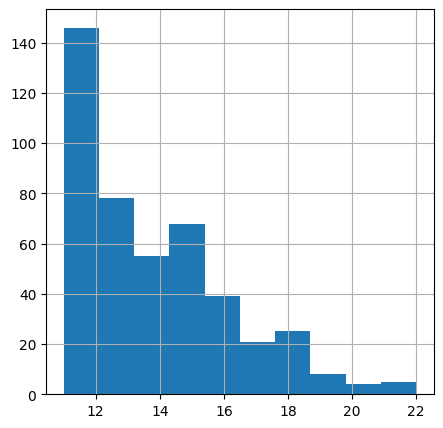

In [39]:
p = df['count_nonzero'].hist(figsize = (5,5))

In [40]:
import pandas as pd

def count_discrete_values(df, column_name):
    value_counts = df[column_name].value_counts().to_dict()
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda item: item[0]))
    return sorted_value_counts

result = count_discrete_values(df, 'count_nonzero')
print("Ditribution of 'count_nonzero':")
for value, count in result.items():
    print(f"{value}: {count}")

Ditribution of 'count_nonzero':
11: 73
12: 73
13: 78
14: 55
15: 68
16: 39
17: 21
18: 25
19: 8
20: 4
21: 3
22: 2


By looking at the mean and distribution of filled columns (or "count_nonzero" values) each album has, we will choose the arbitrary threshold of 10, where every entry with less than 10 columns won't make it to the our dataset.

In [41]:
df2 = df[df['count_nonzero'] >= 10]
df2.drop('count_nonzero', axis=1, inplace=True)

In [42]:
df2.to_csv('full_descriptor_dataset.csv', index=False)